Download manually:

In [1]:
import requests 

url = "https://query1.finance.yahoo.com/v7/finance/download/SHEL.L?period1=1671644977&period2=1703180977&interval=1d&events=history&includeAdjustedClose=true"

with open("SHEL_price_5Y", "wb") as f:
    f.write(requests.get(url).content)


Download bulk with yfinance

In [1]:
import yfinance as yf

stock_list = ['SHEL.L']
data = yf.download(stock_list, start="2018-01-01", end="2023-01-1")
print('data fields downloaded:', set(data.columns.get_level_values(0)))
data.head()

[*********************100%%**********************]  1 of 1 completed
data fields downloaded: {'Volume', 'Close', 'High', 'Adj Close', 'Low', 'Open'}


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2475.0,2476.5,2450.0,2475.5,1863.740356,4590120
2018-01-03,2481.0,2520.0,2477.0,2511.5,1890.844116,4047541
2018-01-04,2526.5,2537.0,2515.0,2533.0,1907.031006,4265619
2018-01-05,2533.0,2537.5,2521.5,2530.0,1904.772461,3920005
2018-01-08,2530.0,2541.5,2523.5,2525.5,1901.384399,3502480


Download single with yfinance (pythonic)

In [2]:
import yfinance as yf

shell = yf.Ticker("shel.l")

shell_history = shell.history(period="5Y").reset_index()
shell_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-12 00:00:00+00:00,1952.756310,1961.135526,1941.584022,1947.170166,50485216,0.00,0.0
1,2019-02-13 00:00:00+00:00,1960.337863,1962.332914,1943.579428,1958.741821,5103221,0.00,0.0
2,2019-02-14 00:00:00+00:00,1974.891129,1977.320767,1960.313298,1965.577515,7661069,35.94,0.0
3,2019-02-15 00:00:00+00:00,1959.907334,1982.583948,1955.452999,1963.146851,6864048,0.00,0.0
4,2019-02-18 00:00:00+00:00,1966.792538,1968.007357,1951.809766,1955.454224,3519663,0.00,0.0


In [54]:
import yfinance as yf

ftse = yf.Ticker("^ftse")

ftse_history = ftse.history(period="5Y").reset_index()
ftse_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-12-24 00:00:00+00:00,6721.200195,6721.200195,6661.000000,6686.000000,192808000,0.0,0.0
1,2018-12-27 00:00:00+00:00,6686.000000,6728.500000,6536.500000,6584.700195,590127000,0.0,0.0
2,2018-12-28 00:00:00+00:00,6584.700195,6742.500000,6584.700195,6734.000000,499812000,0.0,0.0
3,2018-12-31 00:00:00+00:00,6734.000000,6752.500000,6718.299805,6728.100098,225303900,0.0,0.0
4,2019-01-02 00:00:00+00:00,6728.100098,6753.299805,6599.500000,6734.200195,614252000,0.0,0.0


Shift `ftse_history` arbitrarily to compare when plotting

In [45]:
ftse_history_shifted = ftse_history
ftse_history_shifted["Close"] -= 5000

Plot

In [62]:
import plotly.express as px


fig = px.line(shell_history, x="Date", y="Close")
fig.update_traces(line_color='purple')
fig.add_trace(px.line(ftse_history_shifted, x="Date", y="Close").data[0])
fig.update_traces(line_width=0.8)
fig.update_layout(hovermode="x unified")
fig.show()

So some potential features we have so far are: open, (adj.) close, high, low, volume.

Some other features we might want are:
- Williams percentage range
- Rate of change
- Momentum
- RSI
- TMEA

When the RSI surpasses the horizontal 30 reference level, it is a bullish sign and when it slides below the horizontal 70 reference level, it is a bearish sign.

In [65]:
import numpy as np 

df = shell_history

## 14_Day RSI
df['Up Move'] = np.nan
df['Down Move'] = np.nan
df['Average Up'] = np.nan
df['Average Down'] = np.nan
# Relative Strength
df['RS'] = np.nan
# Relative Strength Index
df['RSI'] = np.nan
## Calculate Up Move & Down Move
for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0
    
    if df['Close'][x] > df['Close'][x-1]:
        df['Up Move'][x] = df['Close'][x] - df['Close'][x-1]
        
    if df['Close'][x] < df['Close'][x-1]:
        df['Down Move'][x] = abs(df['Close'][x] - df['Close'][x-1])  
        
## Calculate initial Average Up & Down, RS and RSI
df['Average Up'][14] = df['Up Move'][1:15].mean()
df['Average Down'][14] = df['Down Move'][1:15].mean()
df['RS'][14] = df['Average Up'][14] / df['Average Down'][14]
df['RSI'][14] = 100 - (100/(1+df['RS'][14]))
## Calculate rest of Average Up, Average Down, RS, RSI
for x in range(15, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*13+df['Up Move'][x])/14
    df['Average Down'][x] = (df['Average Down'][x-1]*13+df['Down Move'][x])/14
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_55738/397032365.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_55738/397032365.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_55738/397032365.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipyker

In [68]:
df.head(15)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Up Move,Down Move,Average Up,Average Down,RS,RSI
0,2018-12-24 00:00:00+00:00,1803.526873,1815.497184,1799.137759,1811.507080,2012674,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-27 00:00:00+00:00,1831.457650,1831.457650,1775.197186,1795.147705,6637766,0.0,0.0,0.000000,16.359375,NaN,NaN,NaN,NaN
2,2018-12-28 00:00:00+00:00,1807.516861,1843.826802,1807.516861,1836.245605,5292536,0.0,0.0,41.097900,0.000000,NaN,NaN,NaN,NaN
3,2018-12-31 00:00:00+00:00,1843.826679,1853.003916,1833.851421,1841.432617,1746063,0.0,0.0,5.187012,0.000000,NaN,NaN,NaN,NaN
4,2019-01-02 00:00:00+00:00,1821.083245,1878.939746,1802.329758,1867.767456,5879309,0.0,0.0,26.334839,0.000000,NaN,NaN,NaN,NaN
5,2019-01-03 00:00:00+00:00,1860.585466,1884.925100,1845.024061,1868.565674,5839770,0.0,0.0,0.798218,0.000000,NaN,NaN,NaN,NaN
6,2019-01-04 00:00:00+00:00,1891.308932,1911.658458,1881.333674,1889.712891,6494707,0.0,0.0,21.147217,0.000000,NaN,NaN,NaN,NaN
7,2019-01-07 00:00:00+00:00,1906.870335,1906.870335,1866.969302,1889.712891,7871819,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
8,2019-01-08 00:00:00+00:00,1896.496123,1906.072371,1882.530762,1882.530762,5741420,0.0,0.0,0.000000,7.182129,NaN,NaN,NaN,NaN
9,2019-01-09 00:00:00+00:00,1904.076969,1906.471031,1886.919528,1895.697754,6029708,0.0,0.0,13.166992,0.000000,NaN,NaN,NaN,NaN


In [74]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

fig.add_trace(px.line(df, x="Date", y="Close").data[0], row=1, col=1)
fig.add_trace(px.line(df, x="Date", y="RSI").data[0], row=2, col=1)
fig.update_traces(line_width=0.8)
fig.update_layout(height=300, width=600,)
fig.show()

Moving Average Convergence Divergence (MACD)

In [75]:
## Calculate the MACD and Signal Line indicators
## Calculate the Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 
## Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust=False).mean() 
## Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

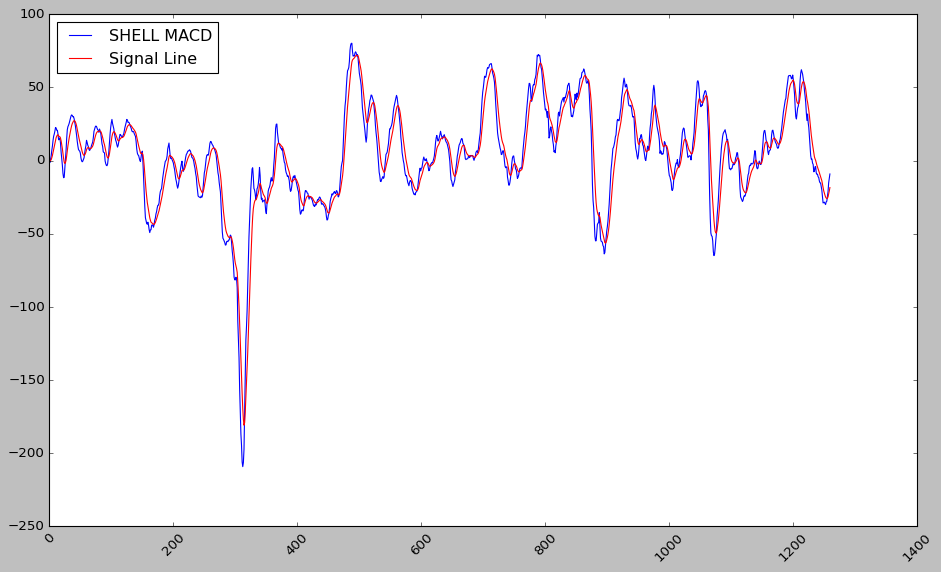

In [79]:
import matplotlib.pyplot as plt

## Plot the Chart
plt.figure(figsize=(14,8))
plt.style.use('classic')
plt.plot(df.index, MACD, label='SHELL MACD', color = 'blue')
plt.plot(df.index, signal, label='Signal Line', color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()